In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

from scipy.cluster.vq import kmeans, vq

##read input files

In [10]:
data_deep_sleep = pd.read_csv("/deep_sleep.csv")
data_sensor = pd.read_csv("/read_sensor.csv")
data_trx = pd.read_csv("/send_different_TX.csv")

##deep sleep data

In [11]:
codebook0, _ = kmeans(data_deep_sleep['Data'], 4)  #cluster mean
#4 cluster to ignore the 2 big spike
codebook0.sort()
codebook0

array([ 59.86443983, 310.9184472 , 494.19333333, 775.4895    ])

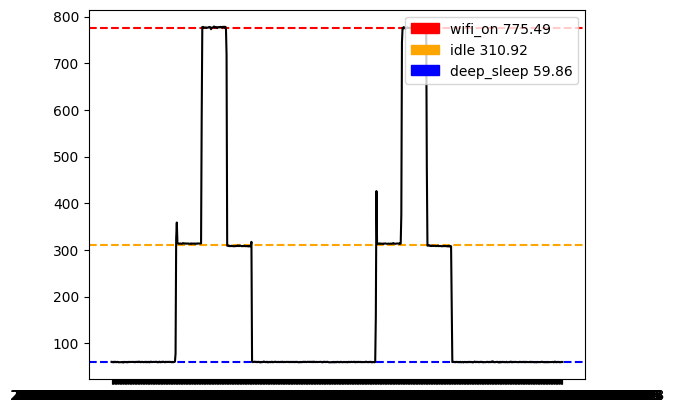

In [12]:
red_patch = mpatches.Patch(color='red', label='wifi_on '+ str(round(codebook0[3], 2)))
blue_patch =  mpatches.Patch(color='blue', label='deep_sleep '+ str(round(codebook0[0], 2)))
orange_patch =  mpatches.Patch(color='orange', label='idle '+ str(round(codebook0[1], 2)))
plt.legend(handles=[red_patch, orange_patch, blue_patch], loc='upper right')

plt.axhline(codebook0[0], color = 'blue', linestyle= 'dashed')
plt.axhline(codebook0[1], color = 'orange', linestyle= 'dashed')
plt.axhline(codebook0[3], color = 'r', linestyle= 'dashed',)

plt.plot(data_deep_sleep['Timestamp'], data_deep_sleep['Data'], color='black')

##sensor data

In [13]:
codebook1, _ = kmeans(data_sensor['Data'], 2)  #cluster mean
idle_mean = min(codebook1)
measure_mean = max(codebook1)
codebook1

array([465.18097744, 332.5898    ])

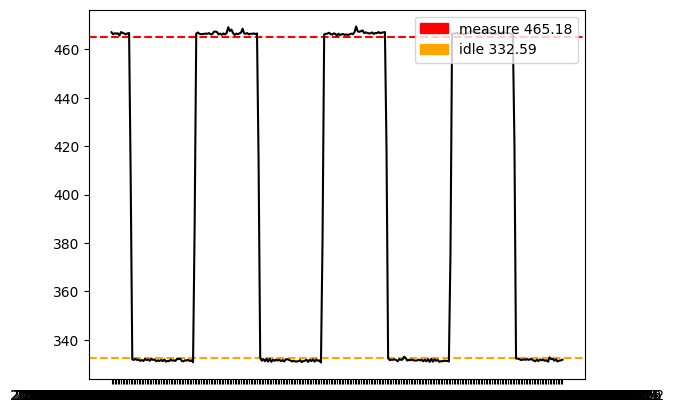

In [14]:
red_patch = mpatches.Patch(color='red', label='measure ' + str(round(measure_mean, 2)))
orange_patch =  mpatches.Patch(color='orange', label='idle ' + str(round(idle_mean, 2)))

plt.legend(handles=[red_patch, orange_patch], loc='upper right')

plt.axhline(idle_mean, color = 'orange', linestyle= 'dashed')
plt.axhline(measure_mean, color = 'r', linestyle= 'dashed')
plt.plot(data_sensor['Timestamp'], data_sensor['Data'], color='black')

##TRX data

In [15]:
codebook2, _ = kmeans(data_trx['Data'], 3)  #cluster mean
codebook2.sort()
codebook2

array([ 704.2153    ,  797.29428571, 1221.76      ])

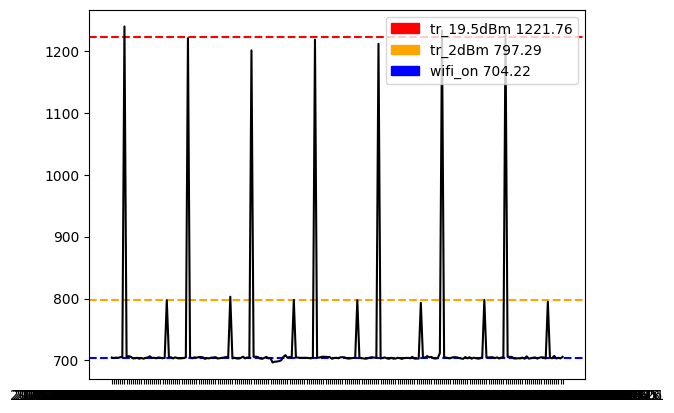

In [18]:
patch0 = mpatches.Patch(color='blue', label= 'wifi_on ' + str(round(codebook2[0], 2)))
patch1 = mpatches.Patch(color='orange', label= 'tr_2dBm ' + str(round(codebook2[1], 2)))
patch2 = mpatches.Patch(color='red', label= 'tr_19.5dBm ' + str(round(codebook2[2], 2)))

plt.legend(handles=[patch2, patch1, patch0], loc='upper right')


plt.axhline(codebook2[0], color = 'blue', linestyle= 'dashed')
plt.axhline(codebook2[1], color = 'orange', linestyle= 'dashed')
plt.axhline(codebook2[2], color = 'r', linestyle= 'dashed')

plt.plot(data_trx['Timestamp'], data_trx['Data'], color='black')
